<a href="https://colab.research.google.com/github/keremyldrr/Plant-Disease-Identification/blob/master/Plant_Disease_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import os
import numpy as np
import pprint
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Github access
!pip install -q xlrd
!git clone https://github.com/keremyldrr/Plant-Disease-Identification.git

Cloning into 'Plant-Disease-Identification'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 54506 (delta 10), reused 16 (delta 4), pack-reused 54484
Receiving objects: 100% (54506/54506), 857.61 MiB | 30.44 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Checking out files: 100% (162300/162300), done.


In [ ]:
# Files from the cloned git repository.
!ls Plant-Disease-Identification/12CLASS/train
!ls Plant-Disease-Identification/12CLASS/test

blight	  healthy  mildew  rot	 scorch  virus
greening  measles  mold    rust  spot
blight	  healthy  mildew  rot	 scorch  virus
greening  measles  mold    rust  spot


In [ ]:
#Check GPU
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#Check CPU and GPU
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8777347762990180726, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4453456230960390780
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12077063240988399618
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11276946637
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12306977731453900178
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
#Train Data Generator with Data Augmentation(Flips, Normalizations, etc.), Train/Validation = 0.8/0.2
train_gen = ImageDataGenerator(featurewise_center=True, samplewise_center=True, 
                               featurewise_std_normalization=True,
                               samplewise_std_normalization=True,
                               zca_whitening=False, zca_epsilon=1e-06,
                               rotation_range=10,
                               width_shift_range=0.0,
                               height_shift_range=0.0, 
                               brightness_range=None,
                               shear_range=0.0, 
                               zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=True,
                               vertical_flip=True, rescale=None, preprocessing_function=None, data_format=None,validation_split=0, dtype=None)

#Preprocessing function
#random_rotation(x, 45)

In [ ]:
#Train Data Generator with Data Augmentation(Flips, Normalizations, etc.), Train/Validation = 0.8/0.2
validation_gen = ImageDataGenerator(featurewise_center=True, samplewise_center=True, 
                               featurewise_std_normalization=True,
                               samplewise_std_normalization=True,
                               zca_whitening=False, zca_epsilon=1e-06,
                               rotation_range=10,
                               width_shift_range=0.0,
                               height_shift_range=0.0, 
                               brightness_range=None,
                               shear_range=0.0, 
                               zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=True,
                               vertical_flip=True, rescale=None, preprocessing_function=None, data_format=None,validation_split=None, dtype=None)

#Preprocessing function
#random_rotation(x, 45)

In [ ]:
#Test Data Generator
test_gen = ImageDataGenerator(featurewise_center=True, samplewise_center=True, 
                               featurewise_std_normalization=True,
                               samplewise_std_normalization=True,
                               zca_whitening=False, zca_epsilon=1e-06,
                               rotation_range=10,
                               width_shift_range=0.0,
                               height_shift_range=0.0, 
                               brightness_range=None,
                               shear_range=0.0, 
                               zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=True,
                               vertical_flip=True, rescale=None, preprocessing_function=None, data_format=None,validation_split=None, dtype=None)



#12 CLASS DATA


In [ ]:
#For 12 class
image_data = train_gen.flow_from_directory("/content/Plant-Disease-Identification/12CLASS/train", shuffle = True, target_size = (224, 224), class_mode = 'binary')
print(image_data)

validation_data = validation_gen.flow_from_directory("/content/Plant-Disease-Identification/12CLASS/validation", shuffle = True, target_size = (224, 224), class_mode = 'binary')
print(validation_data)

test_data = test_gen.flow_from_directory("/content/Plant-Disease-Identification/12CLASS/test", shuffle = False, target_size = (224, 224), class_mode = 'binary')
print(test_data)


Found 34349 images belonging to 11 classes.
Found 8571 images belonging to 11 classes.
Found 10755 images belonging to 11 classes.


#38 CLASS DATA

In [ ]:
#For 38 class
image_data = train_gen.flow_from_directory("/content/Plant-Disease-Identification/38CLASS/train", shuffle = True, target_size = (224, 224), class_mode = 'binary')
print(image_data)

validation_data = train_gen.flow_from_directory("/content/Plant-Disease-Identification/38CLASS/validation", shuffle = True, target_size = (224, 224), class_mode = 'binary')
print(validation_data)

test_data = train_gen.flow_from_directory("/content/Plant-Disease-Identification/38CLASS/test", shuffle = False, target_size = (224, 224), class_mode = 'binary')
print(test_data)


Found 34755 images belonging to 38 classes.
Found 8672 images belonging to 38 classes.
Found 10878 images belonging to 38 classes.


#12 CLASS, CASE 1, ONLY LAST LAYER TRAINABLE

In [ ]:
#12 Classes: CASE 1
checkpoint_path = "drive/My Drive/Colab Notebooks/TensorFlow/training_12_1/cp.ckpt"


checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 monitor='val_loss',
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

In [ ]:
#For 12 classes -> training_12_1.cpkt
#Load pretrained(imagenet) VGG-16 model, leave out FC and Softmax layers
vgg16 = tf.keras.applications.VGG16(include_top = False, weights = 'imagenet', pooling = 'max')

#Only make last layer trainable
for i in range(19):
  vgg16.layers[i].trainable = False

model = tf.keras.models.Sequential()
model.add(vgg16)
model.add(tf.keras.layers.Dense(12 ,activation = 'softmax'))

#See the model summary
#vgg16.summary()
model.summary()
plot_model(vgg16, to_file='drive/My Drive/Colab Notebooks/TensorFlow/vgg.png')
plot_model(model, to_file='drive/My Drive/Colab Notebooks/TensorFlow/model.png')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 12)                6156      
Total params: 14,720,844
Trainable params: 6,156
Non-trainable params: 14,714,688
_________________________________________________________________


#12 CLASS, CASE 2, ONLY LAST THREE LAYERS TRAINABLE


In [ ]:
#For 12 classes  -> training_12_2.cpkt
#Load pretrained(imagenet) VGG-16 model, leave out FC and Softmax layers
vgg16 = tf.keras.applications.VGG16(include_top = False, weights = 'imagenet', pooling = 'max')

#Only make last three layer trainable
for i in range(17):
  vgg16.layers[i].trainable = False

model = tf.keras.models.Sequential()
model.add(vgg16)
model.add(tf.keras.layers.Dense(12 ,activation = 'softmax'))

#See the model summary
#vgg16.summary()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 12)                6156      
Total params: 14,720,844
Trainable params: 2,365,964
Non-trainable params: 12,354,880
_________________________________________________________________


In [ ]:
#12 Classes: CASE 2
checkpoint_path = "drive/My Drive/Colab Notebooks/kerem_check.ckpt"

checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 monitor='val_loss',
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)
csvlog  = tf.keras.callbacks.CSVLogger('drive/My Drive/Colab Notebooks/kerem_check_log.csv',)

#38 CLASS, CASE 1, ONLY LAST LAYER TRAINABLE

In [ ]:
#For 38 classes  -> training_38_1.cpkt
#Load pretrained(imagenet) VGG-16 model, leave out FC and Softmax layers
vgg16 = tf.keras.applications.VGG16(include_top = False, weights = 'imagenet', pooling = 'max')

#Only make last layer trainable
for i in range(19):
  vgg16.layers[i].trainable = False
  
model = tf.keras.models.Sequential()
model.add(vgg16)
model.add(tf.keras.layers.Dense(38 ,activation = 'softmax'))

#See the model summary
model.summary()

In [ ]:
#38 Classes: CASE 1
checkpoint_path = "drive/My Drive/Colab Notebooks/TensorFlow/training_38_1/cp.ckpt"

checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 monitor='val_loss',
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

#38 CLASS, CASE 2, ONLY LAST THREE LAYERS TRAINABLE

In [ ]:
#For 38 classes  -> training_38_2.cpkt
#Load pretrained(imagenet) VGG-16 model, leave out FC and Softmax layers
vgg16 = tf.keras.applications.VGG16(include_top = False, weights = 'imagenet', pooling = 'max')

#Only make last three layers trainable
for i in range(17):
  vgg16.layers[i].trainable = False
  
model = tf.keras.models.Sequential()
model.add(vgg16)
model.add(tf.keras.layers.Dense(38 ,activation = 'softmax'))

#See the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_2 (Dense)              (None, 38)                19494     
Total params: 14,734,182
Trainable params: 2,379,302
Non-trainable params: 12,354,880
_________________________________________________________________


In [ ]:
#38 Classes: CASE 2
checkpoint_path = "drive/My Drive/Colab Notebooks/TensorFlow/WHYTHO/cp2.ckpt"

checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 monitor='val_loss',
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

#COMPILE THE MODEL

In [ ]:
model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['acc']
)

In [ ]:
#Load pretrained weights
#model.load_weights(checkpoint_path)

#SKIP this block, if you only want to evaluate the results
#Fit generator
model.fit_generator(
    image_data,
    epochs=100,
    steps_per_epoch=200,
    validation_data = validation_data,
    callbacks = [cp_callback,csvlog],
    verbose = 1
)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


268/268 [==============================] - 149s 557ms/step - loss: 0.4759 - acc: 0.9323

Epoch 00001: val_loss improved from inf to 0.47590, saving model to drive/My Drive/Colab Notebooks/kerem_check.ckpt
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
1074/1074 [==============================] - 774s 720ms/step - loss: 0.6030 - acc: 0.8881 - val_loss: 0.4759 - val_acc: 0.9323
Epoch 2/100
268/268 [==============================] - 146s 545ms/step - loss: 0.5042 - acc: 0.9210

Epoch 00002: val_loss did not improve from 0.47590
1074/1074 [==============================] - 756s 704ms/step - loss: 0.4804 - acc: 0.9302 - val_loss: 0.5042 - val_acc: 0.9210
Epoch 3/100
268/268 [==============================] - 147s 548ms/step - loss: 0.4623 - acc: 0.9383

Epoch 00003: val_loss improved from 0.47590 to 0.46227, saving model to drive/My Drive/Colab Notebooks/kerem_check.ckpt
1074/1074 [==========================

#TEST



In [ ]:
#Evaluate performance over test data
model.load_weights(checkpoint_path)
loss,acc = model.evaluate_generator(test_data)
print("Loss(Test Data)", loss)
print("Accuracy(Test Data)", acc)
#See class probabilities
pred = model.predict_generator(test_data)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:1131: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:1139: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Loss(Test Data) 0.12167287780651384
Accuracy(Test Data) 0.9652509651852127


Peach___Bacterial_spot/Peach___Bacterial_spot305.jpgGrape___Leaf_blight_(Isariopsis_Leaf_Spot)/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)6.jpg


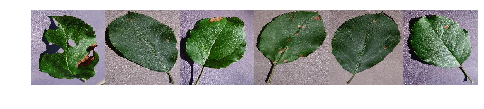

In [ ]:
#Find misclassified examples

plt.close()

ind = np.absolute(np.argmax(pred, axis = 1)-test_data.classes)
item = 7 #Must be more than 1
index = np.where(ind == item) 
tclas = test_data.classes[index]
fclas = pred[index]

img = plt.imread("Plant-Disease-Identification/38CLASS/test/"+test_data.filenames[index[0][0]])
img0 = plt.imread("Plant-Disease-Identification/38CLASS/test/"+test_data.filenames[index[0][0]+1])
img1 = plt.imread("Plant-Disease-Identification/38CLASS/test/"+test_data.filenames[index[0][0]+2])
img2 = plt.imread("Plant-Disease-Identification/38CLASS/test/"+test_data.filenames[index[0][0]+3])
img3 = plt.imread("Plant-Disease-Identification/38CLASS/test/"+test_data.filenames[index[0][0]+4])
img4 = plt.imread("Plant-Disease-Identification/38CLASS/test/"+test_data.filenames[index[0][0]+5])


for i in range(1800,2800):#range(pred.shape[0]):
  if i in index[0]:
    img5 = plt.imread("Plant-Disease-Identification/38CLASS/test/"+ test_data.filenames[i])
    img6 = plt.imread("Plant-Disease-Identification/38CLASS/test/"+test_data.filenames[i+1])
    img7 = plt.imread("Plant-Disease-Identification/38CLASS/test/"+test_data.filenames[i+2])
    img8 = plt.imread("Plant-Disease-Identification/38CLASS/test/"+test_data.filenames[i+3])
    img9 = plt.imread("Plant-Disease-Identification/38CLASS/test/"+test_data.filenames[i+4])
    img10 = plt.imread("Plant-Disease-Identification/38CLASS/test/"+test_data.filenames[i+5])    
    break    
    
print(test_data.filenames[index[0][0]]+test_data.filenames[i])
plt.subplot(1,6,1)
plt.grid(False)
plt.axis('Off')
plt.imshow(img5)
plt.subplot(1,6,2)
plt.grid(False)
plt.axis('Off')
plt.imshow(img6)
plt.subplot(1,6,3)
plt.grid(False)
plt.axis('Off')
plt.imshow(img7)
plt.subplot(1,6,4)
plt.grid(False)
plt.axis('Off')
plt.imshow(img8)
plt.subplot(1,6,5)
plt.grid(False)
plt.axis('Off')
plt.imshow(img9)
plt.subplot(1,6,6)
plt.grid(False)
plt.axis('Off')
plt.imshow(img10)

plt.subplots_adjust(hspace = -0.7, wspace = 0)


#print(test_data.filenames[index[0][0]]+"_misclassified_as_"+test_data.filenames[i])
plt.savefig("drive/My Drive/Colab Notebooks/TensorFlow/Results/Grape_Leaf_Blight.jpg")


In [ ]:
#Plot accuracy graph

fig = plt.figure()
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig.savefig('drive/My Drive/Colab Notebooks/TensorFlow/Results/Accuracy_12_1.eps')

AttributeError: ignored

<Figure size 576x396 with 0 Axes>

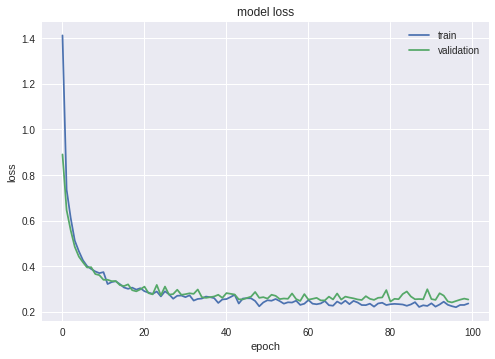

In [ ]:
#Plot loss graph

fig2 = plt.figure()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
fig2.savefig('drive/My Drive/Colab Notebooks/TensorFlow/Results/Loss_12_1.png')

In [ ]:
matrix = metrics.confusion_matrix(test_data.argmax(axis=1), y_pred.argmax(axis=1))

AttributeError: ignored

In [ ]:
# pred = vg.predict_generator(validation_data)

from sklearn.metrics import confusion_matrix
#test_data = train_gen.flow_from_directory("/content/Plant-Disease-Identification/38CLASS/test", shuffle = False, target_size = (224, 224), class_mode = 'binary')
#pred = model.predict_generator(test_data)
final_predictions = np.argmax(pred,axis=1)
labels = test_data.classes
cnf = confusion_matrix(labels,final_predictions)

precisions = {}
recalls = {}
for i in range(len(cnf)):
  row = cnf[i]
  precisions[i] = row[i]/sum(row)
  recalls[i] = row[i]/sum(cnf[:,i])
  
  
table = pd.DataFrame.from_dict(precisions,orient="index")
table["Recall"] =  pd.DataFrame.from_dict(recalls,orient="index").values
table.rename(columns={0:"Precision"},inplace=True)

dicty = test_data.class_indices
inv_map = {v: k for k, v in dicty.items()}
for i in range(len(cnf)):
  table = table.rename({i:inv_map[i]})
table.to_csv("drive/My Drive/Colab Notebooks/TensorFlow/Results/precision_recalls_38_2.csv")